### Часть 1: исследуем зависимость от стратегии начальной реализации.
Реализовано 4 стратегии:<br>
1) *KMeans++*<br>
2) *Стратегия равномерного распределения*: Область, в которой находятся точки, разбивается на m прямоугольников так, чтобы m было максимально близко к заданному количеству кластеров k (но не меньше его). Затем среди этих прямоугольников случайным образом выбираются k, и в качестве начальных центров для кластеров определяются центры этих прямоугольников.<br>
3) *Стратегия случайных чисел*: Находим промежутки по каждой оси ([x<sub>0</sub>, x<sub>1</sub>] по абсцисс, [y<sub>0</sub>, y<sub>1</sub>] по ординат), в пределах которых расположены заданные точки. Затем k раз выбираем два случайных числа на отрезках [x<sub>0</sub>, x<sub>1</sub>] и [y<sub>0</sub>, y<sub>1</sub>]. Они станут начальными координатами центров для кластеров.<br>
4) *Стратегия выбора из данных точек*: Выбираем k точек из предложенных случайным образом.<br><br><br>
N = 100 (количество точек)<br>
K = 4 (количество кластеров)<br>
Заданное для KMeans количество кластеров **совпадает** с заданным для make_blobs.

In [1]:
from mylib import *


def show_strats(n, k_for_means, k_for_blobs, after_dot = 7):
    x, _ = make_blobs(n_samples = n, n_features = 2, centers = k_for_blobs, random_state = 4)
    xtext = x[:, 0].min() + 1
    ytext = x[:, 1].max() - 1
    pylab.figure(0, figsize = (15, 10))
    strats = ["plusplus", "uniform", "random", "choice"]
    msg = ["KMeans++\n", "Равномерное распределение\n", "Случайные числа\n", "Выбор из данных точек\n" ]
    for i in range(len(strats)):
        t = time.time()
        st, xc, yc = KMeans4(x, k = k_for_means, strat = strats[i])
        t = time.time() - t
        st, _, _ = clusters_sorted(st, xc, yc)
        pylab.subplot(2, 2, i + 1)
        plt.scatter(x[:, 0], x[:, 1], c = st)
        pylab.text(xtext, ytext, msg[i] + "Время: " + str(t)[:after_dot])
    plt.show()

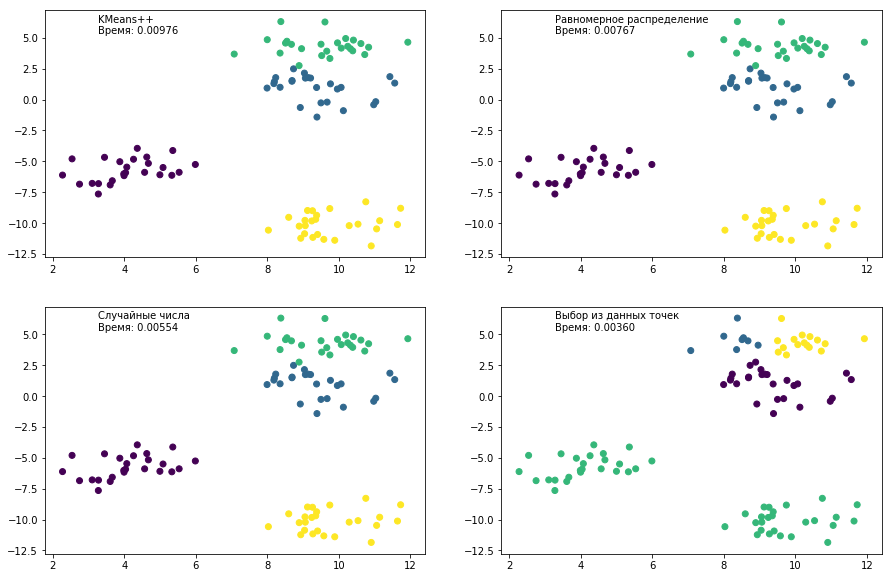

In [2]:
show_strats(100, 4, 4)

N = 100 <br>
K = 4 <br>
Заданное для KMeans количество кластеров **не совпадает** с заданным для make_blobs.

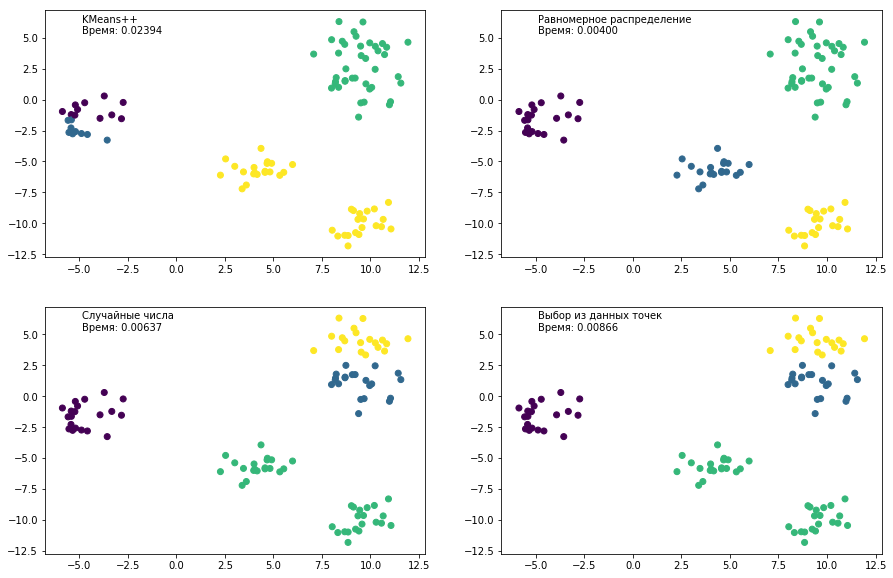

In [4]:
show_strats(100, 4, 5)

N = 1000 (количество точек) <br>
K = 4 (количество кластеров) <br>
Заданное для KMeans количество кластеров **совпадает** с заданным для make_blobs.

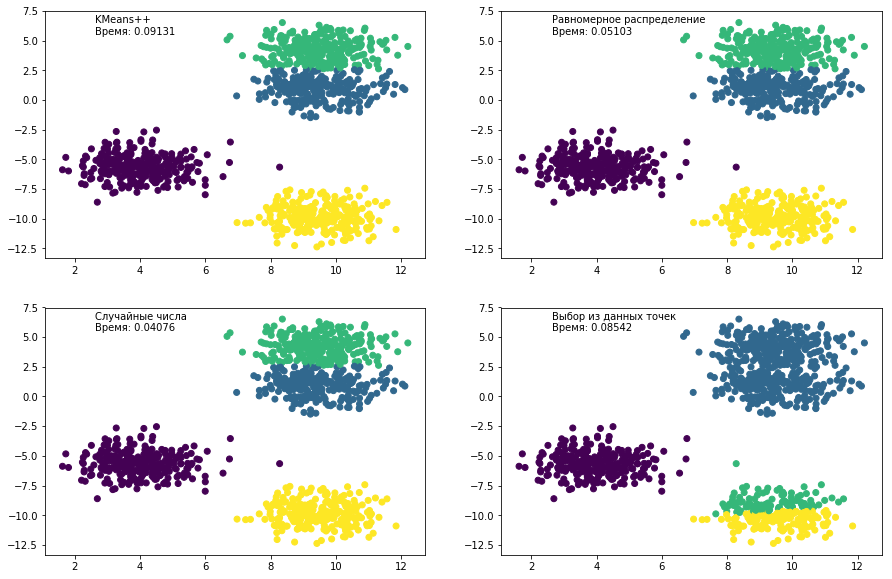

In [5]:
show_strats(1000, 4, 4)

N = 1000 <br>
K = 4 <br>
Заданное для KMeans количество кластеров **не совпадает** с заданным для make_blobs.

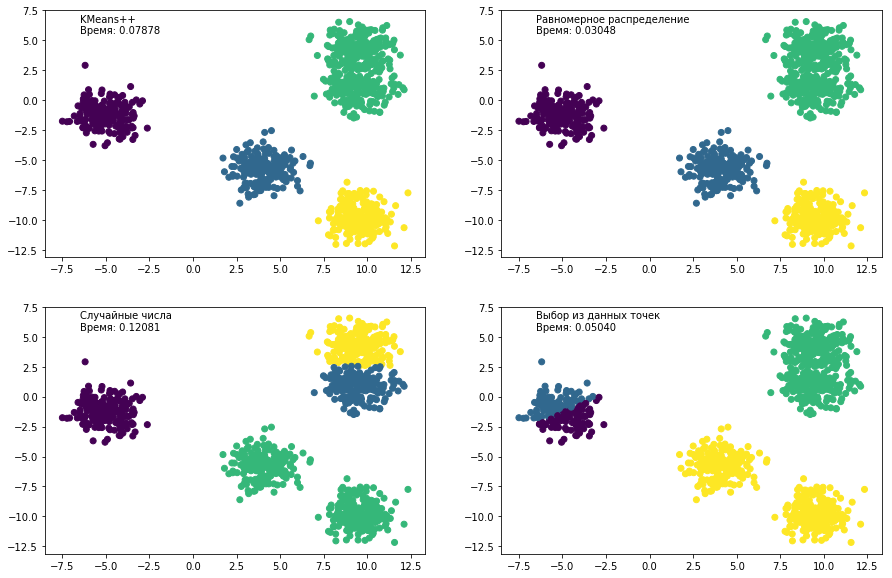

In [6]:
show_strats(1000, 4, 5)

Анализ скорости и точности методов начальной инициализации (по сравнению с библиотечной функцией sklearn.cluster.KMeans)

In [2]:
from sklearn.cluster import KMeans
import pandas as pd


tests = [(100, 3), (1000, 4), (900, 3), (1400, 6), (5000, 8), (600, 5), (1999, 7)]
strats = ("plusplus", "uniform", "random", "choice")
plus_t = []
uni_t = []
ran_t = []
chs_t = []
times = (plus_t, uni_t, ran_t, chs_t)
plus_a = []
uni_a = []
ran_a = []
chs_a = []
accurs = (plus_a, uni_a, ran_a, chs_a)

for i in range(len(tests)):
    x, _ = make_blobs(n_samples = tests[i][0], n_features = 2, centers = tests[i][1], random_state = 4)
    true_time = time.time()
    true_cl = KMeans(n_clusters = tests[i][1], random_state = 4).fit_predict(x)
    true_time = time.time() - true_time
    xc, yc = clusters_centers(x, true_cl)
    true_cl, _, _ = clusters_sorted(true_cl, xc, yc)
    for j in range(len(strats)):
        t = time.time()
        cl, xc, yc = KMeans4(x, k = tests[i][1], strat = strats[j])
        t = time.time() - t
        cl, _, _ = clusters_sorted(cl, xc, yc)
        times[j].append(t / true_time)
        overl = list(true_cl == cl).count(True)
        accurs[j].append(str(((overl / tests[i][0]) * 100))[:4] + "%")

table = {"KMeans++": plus_t, "Uniform": uni_t, "Random": ran_t, "Choice": chs_t}
pd.DataFrame(table, index = tests)
print("Таблица сравнения времени работы: во сколько раз время работы функции с определенной стратегией\nинициализации превышает время работы библиотечной функции.")
pd.DataFrame(table, index = tests)

Таблица сравнения времени работы: во сколько раз время работы функции с определенной стратегией
инициализации превышает время работы библиотечной функции.


,KMeans++,Uniform,Random,Choice
"(100, 3)",0.116314,0.100736,0.082885,0.144400
"(1000, 4)",4.094873,3.172484,2.653043,6.113296
"(900, 3)",2.639837,2.128665,4.573725,3.012689
"(1400, 6)",6.616832,7.528835,11.313432,16.607514
"(5000, 8)",45.939185,20.678158,36.100584,8.775034
"(600, 5)",2.441874,3.125418,8.290717,14.478380
"(1999, 7)",11.288735,11.921729,8.767526,26.150072


In [22]:
table = {"KMeans++": plus_a, "Uniform": uni_a, "Random": ran_a, "Choice": chs_a}
print("Таблица сравнения точности работы: на сколько % распределение по кластерам совпадает\nс распределением библиотечной функции.")
pd.DataFrame(table, index = tests)

Таблица сравнения точности работы: на сколько % распределение по кластерам совпадает
с распределением библиотечной функции.


,KMeans++,Uniform,Random,Choice
"(100, 3)",100.%,100.%,56.9%,100.%
"(1000, 4)",100.%,100.%,100.%,64.0%
"(900, 3)",100.%,100.%,47.6%,100.%
"(1400, 6)",75.2%,99.9%,75.4%,50.0%
"(5000, 8)",45.6%,43.6%,43.3%,62.3%
"(600, 5)",68.0%,100.%,30.6%,36.1%
"(1999, 7)",78.6%,78.2%,50.9%,78.8%


Сравнение скорости и точности работы KMeans при разных стратегиях инициализации при n = 100, k = 3.

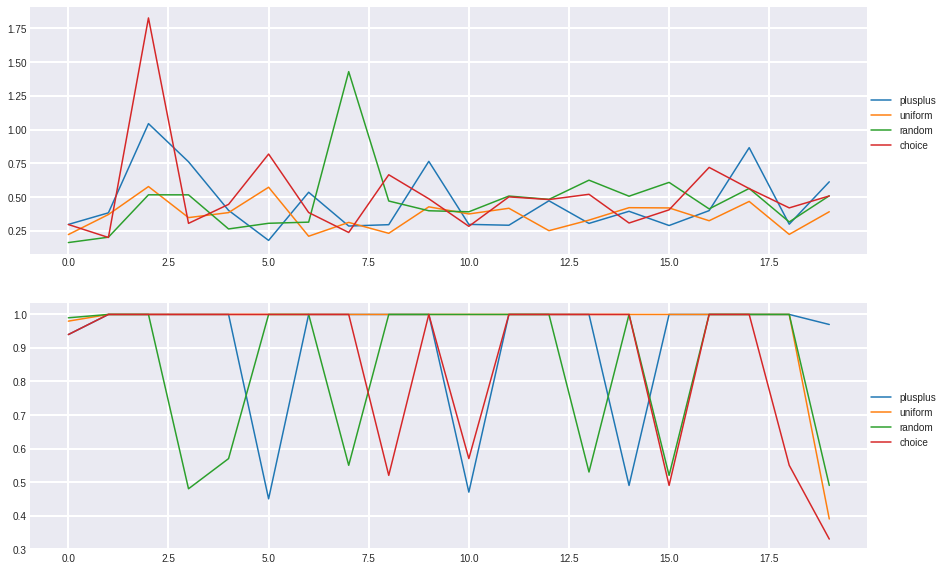

In [33]:
def strats_compar(k, n, n_tests):
    times = ([], [], [], [])
    accurs = ([], [], [], [])
    for i in range(n_tests):
        x, _ = make_blobs(n_samples = n, n_features = 2, centers = k, random_state = i)
        true_time = time.time()
        true_cl = KMeans(n_clusters = k, random_state = 4).fit_predict(x)
        true_time = time.time() - true_time
        xc, yc = clusters_centers(x, true_cl)
        true_cl, _, _ = clusters_sorted(true_cl, xc, yc)
        for j in range(len(strats)):
            t = time.time()
            cl, xc, yc = KMeans4(x, k = k, strat = strats[j])
            t = time.time() - t
            cl, _, _ = clusters_sorted(cl, xc, yc)
            times[j].append(t / true_time)
            overl = list(true_cl == cl).count(True)
            accurs[j].append(overl / n)
    pylab.figure(0, figsize = (15, 10))
    pylab.subplot(211)
    for i in range(len(strats)):
        plt.plot(range(n_tests), times[i], label = strats[i])
    plt.legend(loc=(1, 0.4))
    plt.grid(lw=2)
    pylab.subplot(212)
    for i in range(len(strats)):
        plt.plot(range(n_tests), accurs[i], label = strats[i])
    plt.legend(loc=(1, 0.4))
    plt.grid(lw=2)
    plt.show()

strats_compar(3, 100, 20)

Сравнение скорости и точности работы KMeans при разных стратегиях инициализации при n = 1000, k = 4.

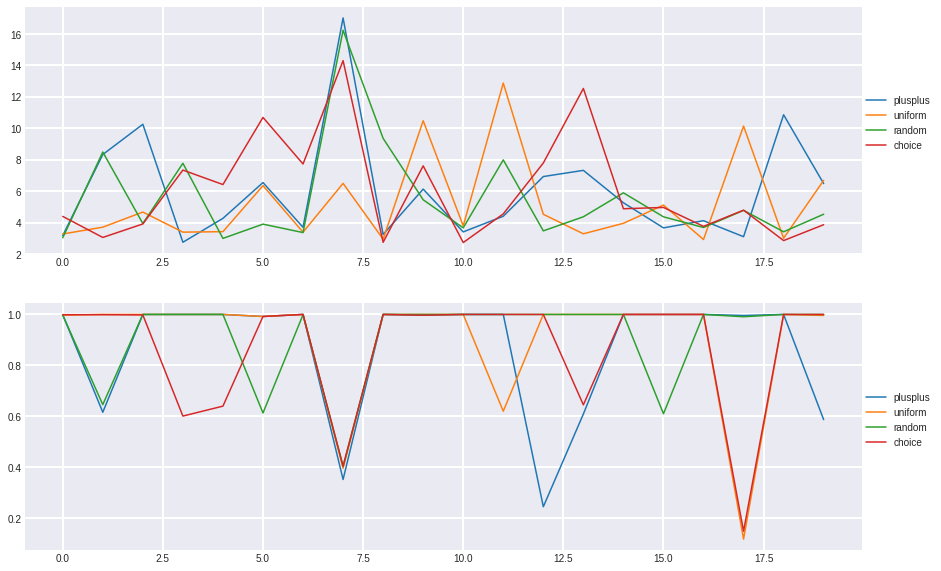

In [35]:
strats_compar(4, 1000, 20)

Сравнение скорости и точности работы KMeans при разных стратегиях инициализации при n = 10000, k = 4.

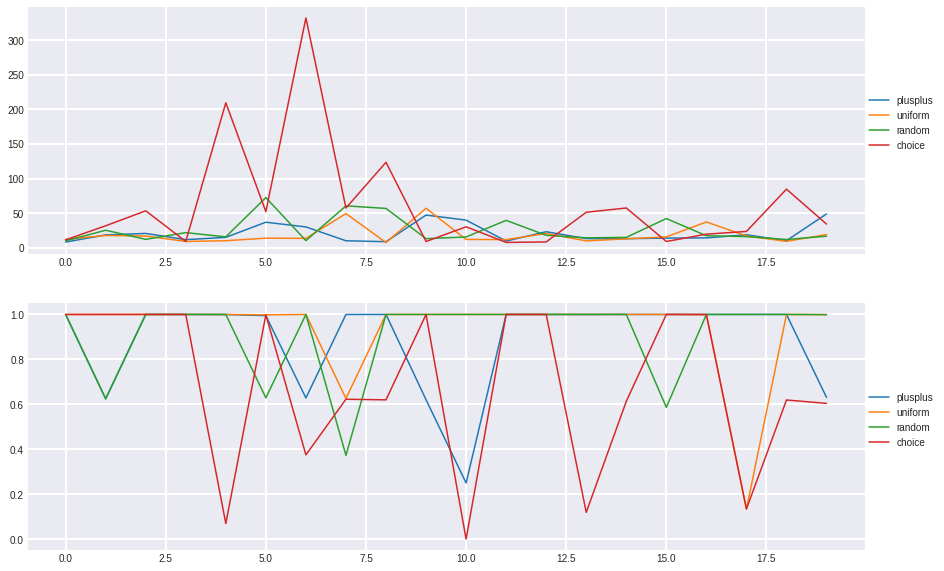

In [36]:
strats_compar(4, 10000, 20)